In [21]:
import gpflow as gp
import numpy as np
from gpflow.utilities import print_summary
import matplotlib.pyplot as plt

In [40]:
X = np.array([-2.5,-1.5,-0.5,0.5,1.5,2.5]).reshape(-1,1)
y = np.exp(-X**2)

In [41]:
k = gp.kernels.SquaredExponential()
mean = gp.mean_functions.Zero()

In [42]:
model = gp.models.GPR(data = (X,y), kernel = k, mean_function = mean)
print_summary(model)

name                     class      transform    trainable    shape    dtype      value
-----------------------  ---------  -----------  -----------  -------  -------  -------
GPR.kernel.variance      Parameter  Softplus     True         ()       float64        1
GPR.kernel.lengthscale   Parameter  Softplus     True         ()       float64        1
GPR.likelihood.variance  Parameter  Softplus     True         ()       float64        1


In [43]:
opt = gpflow.optimizers.Scipy()

def objective_closure():
    return - model.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        model.trainable_variables,
                        options=dict(maxiter=100))
print_summary(model)

name                     class      transform    trainable    shape    dtype          value
-----------------------  ---------  -----------  -----------  -------  -------  -----------
GPR.kernel.variance      Parameter  Softplus     True         ()       float64  0.200722
GPR.kernel.lengthscale   Parameter  Softplus     True         ()       float64  1.11879
GPR.likelihood.variance  Parameter  Softplus     True         ()       float64  1.26882e-08


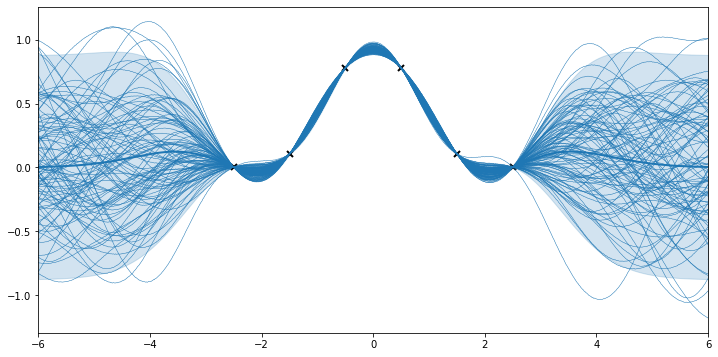

In [46]:
xx = np.linspace(-6, 6, 1000).reshape(1000, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = model.predict_f(xx)

## generate 10 samples from posterior
samples = model.predict_f_samples(xx, 100)  # shape (10, 100, 1)

## plot
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].numpy().T, 'C0', linewidth=.5)
plt.xlim(-6, 6);

In [47]:
print(model.log_marginal_likelihood())

tf.Tensor(-1.5559969367667552, shape=(), dtype=float64)
